In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sea
import math
#import sweetviz

In [536]:
data = pd.read_csv('D:/Folder/main/!! PACE/Data science/Assignment 1/telco-customer-churn.csv')

In [537]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data cleaning 

In [55]:
colu = data.columns.to_list()
colu

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [56]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The sum of null came out to be zero for all the columns but in the later part we will discuss the issue with the *isnull()* function.

In [58]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Getting the number of unique values to get an idea of range of values in column.

In [219]:
'''data = data.replace(['Yes', 'No'],[1,0])
data'''

"data = data.replace(['Yes', 'No'],[1,0])\ndata"

## Integer mapping/ transforming data

In [601]:
data_copy = data.copy()

In [602]:
data_copy.drop('customerID', axis=1, inplace=True)

In [223]:
data_copy.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [99]:
conv_colu = colu.copy()
x = ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for xx in x:
    conv_colu.remove(xx)
    
conv_colu

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Above are the columns that need to be mapped with integer as they not in numeric type, other columns need not to be mapped.

In [599]:
def int_map(df, column_name):
    dfc = df.copy()
    values = dfc[column_name].unique()
    intmap = {name:val for val,name in enumerate(values)}
    print(intmap)
    dfc[column_name] = dfc[column_name].replace(intmap)
    return(dfc)

In [603]:
for i in conv_colu:
    data_copy = int_map(data_copy, i)
data_copy

{'Female': 0, 'Male': 1}
{'Yes': 0, 'No': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No phone service': 0, 'No': 1, 'Yes': 2}
{'DSL': 0, 'Fiber optic': 1, 'No': 2}
{'No': 0, 'Yes': 1, 'No internet service': 2}
{'Yes': 0, 'No': 1, 'No internet service': 2}
{'No': 0, 'Yes': 1, 'No internet service': 2}
{'No': 0, 'Yes': 1, 'No internet service': 2}
{'No': 0, 'Yes': 1, 'No internet service': 2}
{'No': 0, 'Yes': 1, 'No internet service': 2}
{'Month-to-month': 0, 'One year': 1, 'Two year': 2}
{'Yes': 0, 'No': 1}
{'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
{'No': 0, 'Yes': 1}


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.5,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.9,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.6,1


In [226]:
data_copy.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [229]:
data_copy['TotalCharges'] = data_copy['TotalCharges'].astype(np.float64)
data_copy.dtypes

ValueError: could not convert string to float: 

We got the error as not all the values in column *TotalCharge* are numeric, so now we need to find the point of error and the reason for error.

In [237]:
try:
    for x in range(len(data_copy)):
        float(data_copy['TotalCharges'][x])
    
except:
    print('index: ', x, 'value: ', data_copy['TotalCharges'][x])

index:  488 value:   


In [238]:
data_copy['TotalCharges'][488]

' '

Here we see that the ' ' (white space) was not detected in *isnull()* function but we still need to remove them but first we need to find all the whitespaces.

In [604]:
all_nulls = []
for x in range(len(data_copy)):
    if data_copy['TotalCharges'][x] == ' ' or None:
        print(x)
        all_nulls.append(x)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [606]:
data_copy.drop(all_nulls, inplace=True)
data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.5,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.9,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.6,1


In [247]:
data.drop(all_nulls, inplace=True)

In [607]:
data_copy['TotalCharges'] = data_copy['TotalCharges'].astype(np.float64)
data_copy.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Outliers

In [256]:
data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


In [257]:
out_colu = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_out = data_copy[out_colu].copy()
data_out

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


We chose only these three columns as these columns have larger range of values and its only possible to have outliers if the range is large.

In [259]:
q1 = [np.percentile(data_out[out_colu[x]], 25, interpolation = 'midpoint') for x in range(3)]
q1

[9.0, 35.575, 401.4]

In [260]:
q3 = [np.percentile(data_out[out_colu[x]], 75, interpolation = 'midpoint') for x in range(3)]
q3

[55.0, 89.875, 3794.975]

In [262]:
IQR = [q3[x] - q1[x] for x in range(3)]
IQR

[46.0, 54.3, 3393.575]

In [263]:
upper = [np.where(data_out[out_colu[x]] >= (q3[x]+1.5*IQR[x])) for x in range(3)]
upper

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),)]

In [264]:
lower = [np.where(data_out[out_colu[x]] <= (q1[x]-1.5*IQR[x])) for x in range(3)]
lower

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),)]

We got all null arrays means there are no outliers.

## EDA
#### Exploratory Data Analysis

In [609]:
#data_copy.describe()

In [250]:
cor = data_copy.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,0.001379,0.010349,0.005285,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.015683,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.381912,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.097825,-0.319072,0.149982
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.163386,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,-0.381912,0.163386,1.000000,0.007877,0.259112,-0.029835,0.147575,-0.253575,0.180895,0.146727,0.138208,0.142143,0.676734,-0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,0.007877,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.259112,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.491412,0.412495,0.036148
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.029835,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.147575,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.620532,-0.153234,-0.332443
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.253575,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.710175,-0.537726,-0.073934


In [103]:
'''for x in conv_colu[1:]:
    temp = data_copy[x]
    print('temp: ',temp)
    values = list(temp.unique())
    print('values: ', values)
    data_copy = data_copy.replace(values, [x for x in range(len(values))])
    
data_copy'''

"for x in conv_colu[1:]:\n    temp = data_copy[x]\n    print('temp: ',temp)\n    values = list(temp.unique())\n    print('values: ', values)\n    data_copy = data_copy.replace(values, [x for x in range(len(values))])\n    \ndata_copy"

<AxesSubplot:>

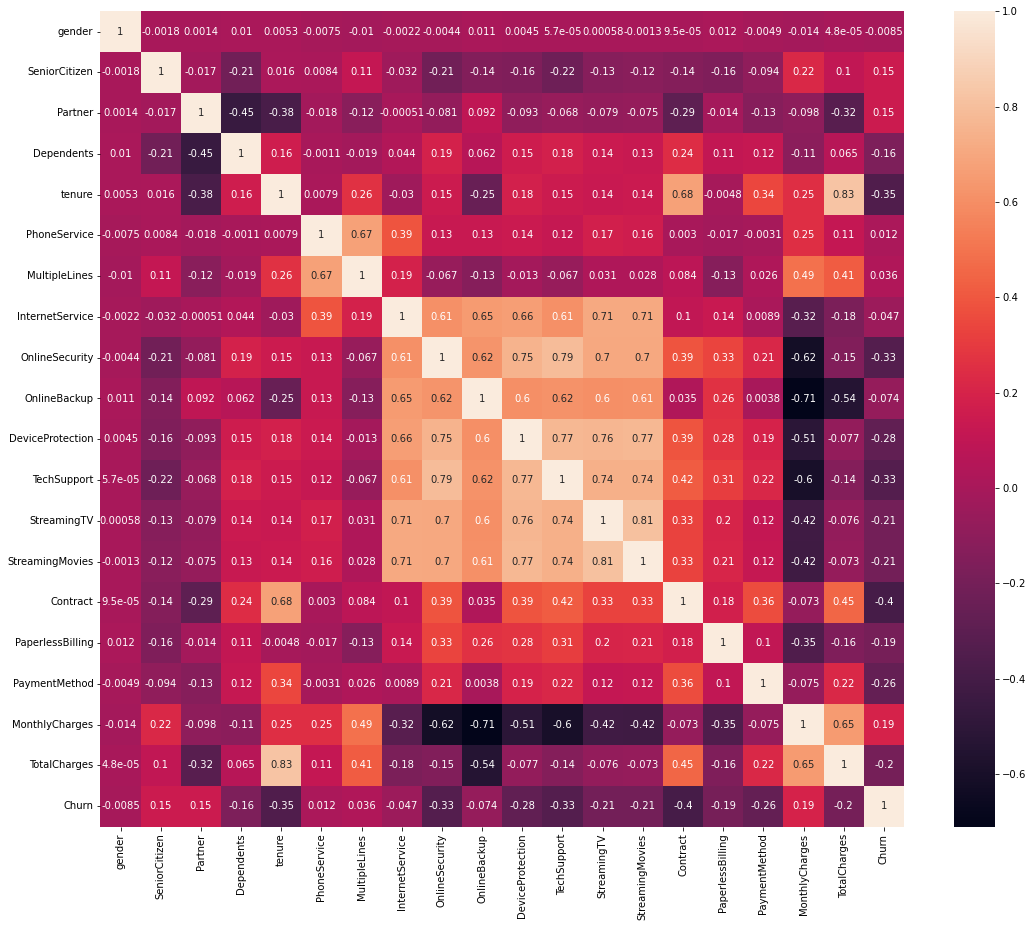

In [612]:
plt.figure(figsize=(18,15))
sea.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

From these Heatmap, we can see that the *gender* row and column is of same colour that represents the value close to 0, which means that the feature *gender* is not coorelated to anything.

In [252]:
cor.sort_values(by=['Churn'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Contract,0.000095,-0.141820,-0.294094,0.240556,0.676734,0.003019,0.084037,0.099579,0.389138,0.034745,0.389480,0.417691,0.327109,0.331126,1.000000,0.175475,0.359487,-0.072739,0.450306,-0.396150
tenure,0.005285,0.015683,-0.381912,0.163386,1.000000,0.007877,0.259112,-0.029835,0.147575,-0.253575,0.180895,0.146727,0.138208,0.142143,0.676734,-0.004823,0.340939,0.246862,0.825880,-0.354049
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.147575,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.620532,-0.153234,-0.332443
TechSupport,0.000057,-0.223438,-0.068277,0.179176,0.146727,0.123533,-0.066814,0.609422,0.790951,0.616520,0.767659,1.000000,0.737211,0.737126,0.417691,0.310354,0.217412,-0.596805,-0.141011,-0.329474
DeviceProtection,0.004526,-0.156700,-0.093391,0.154819,0.180895,0.138938,-0.012819,0.662685,0.748684,0.600952,1.000000,0.767659,0.762742,0.766635,0.389480,0.275519,0.192405,-0.512604,-0.077394,-0.281048
PaymentMethod,-0.004928,-0.093712,-0.133280,0.124002,0.340939,-0.003106,0.026248,0.008851,0.214330,0.003786,0.192405,0.217412,0.118181,0.124805,0.359487,0.101790,1.000000,-0.074640,0.222694,-0.262918
StreamingMovies,-0.001339,-0.120658,-0.075310,0.125086,0.142143,0.164379,0.027944,0.708336,0.704672,0.606037,0.766635,0.737126,0.809507,1.000000,0.331126,0.211242,0.124805,-0.423773,-0.072571,-0.207150
StreamingTV,0.000578,-0.129721,-0.079066,0.138809,0.138208,0.171773,0.030524,0.712715,0.701526,0.603551,0.762742,0.737211,1.000000,0.809507,0.327109,0.202967,0.118181,-0.422060,-0.075697,-0.205246
TotalCharges,0.000048,0.102411,-0.319072,0.064653,0.825880,0.113008,0.412495,-0.175691,-0.153234,-0.537726,-0.077394,-0.141011,-0.075697,-0.072571,0.450306,-0.157830,0.222694,0.651065,1.000000,-0.199484
PaperlessBilling,0.011902,-0.156258,-0.013957,0.110131,-0.004823,-0.016696,-0.133538,0.138166,0.333656,0.260691,0.275519,0.310354,0.202967,0.211242,0.175475,1.000000,0.101790,-0.351930,-0.157830,-0.191454


Sorting the coorelated dataframe to find the most positively and negitively coorelated features to *churn*

In [407]:
highest_coorelation = ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'DeviceProtection', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'TotalCharges', 'PaperlessBilling', 'Dependents', 'Partner', 'SeniorCitizen', 'MonthlyCharges', 'Churn']

In [408]:
short_data = data_copy[highest_coorelation].copy()
short_data

,Contract,tenure,OnlineSecurity,TechSupport,DeviceProtection,PaymentMethod,StreamingMovies,StreamingTV,TotalCharges,PaperlessBilling,Dependents,Partner,SeniorCitizen,MonthlyCharges,Churn
0,0,1,0,0,0,0,0,0,29.85,0,0,0,0,29.85,0
1,1,34,1,0,1,1,0,0,1889.50,1,0,1,0,56.95,0
2,0,2,1,0,0,1,0,0,108.15,0,0,1,0,53.85,1
3,1,45,1,1,1,2,0,0,1840.75,1,0,1,0,42.30,0
4,0,2,0,0,0,0,0,0,151.65,0,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,1,1,1,1,1,1,1990.50,0,1,0,0,84.80,0
7039,1,72,0,0,1,3,1,1,7362.90,0,1,0,0,103.20,0
7040,0,11,1,0,0,0,0,0,346.45,0,1,0,0,29.60,0
7041,0,4,0,0,0,1,0,0,306.60,0,0,0,1,74.40,1


In [409]:
sho_cor = short_data.corr()
sho_cor

,Contract,tenure,OnlineSecurity,TechSupport,DeviceProtection,PaymentMethod,StreamingMovies,StreamingTV,TotalCharges,PaperlessBilling,Dependents,Partner,SeniorCitizen,MonthlyCharges,Churn
Contract,1.000000,0.676734,0.389138,0.417691,0.389480,0.359487,0.331126,0.327109,0.450306,0.175475,0.240556,-0.294094,-0.141820,-0.072739,-0.396150
tenure,0.676734,1.000000,0.147575,0.146727,0.180895,0.340939,0.142143,0.138208,0.825880,-0.004823,0.163386,-0.381912,0.015683,0.246862,-0.354049
OnlineSecurity,0.389138,0.147575,1.000000,0.790951,0.748684,0.214330,0.704672,0.701526,-0.153234,0.333656,0.188889,-0.081078,-0.210546,-0.620532,-0.332443
TechSupport,0.417691,0.146727,0.790951,1.000000,0.767659,0.217412,0.737126,0.737211,-0.141011,0.310354,0.179176,-0.068277,-0.223438,-0.596805,-0.329474
DeviceProtection,0.389480,0.180895,0.748684,0.767659,1.000000,0.192405,0.766635,0.762742,-0.077394,0.275519,0.154819,-0.093391,-0.156700,-0.512604,-0.281048
PaymentMethod,0.359487,0.340939,0.214330,0.217412,0.192405,1.000000,0.124805,0.118181,0.222694,0.101790,0.124002,-0.133280,-0.093712,-0.074640,-0.262918
StreamingMovies,0.331126,0.142143,0.704672,0.737126,0.766635,0.124805,1.000000,0.809507,-0.072571,0.211242,0.125086,-0.075310,-0.120658,-0.423773,-0.207150
StreamingTV,0.327109,0.138208,0.701526,0.737211,0.762742,0.118181,0.809507,1.000000,-0.075697,0.202967,0.138809,-0.079066,-0.129721,-0.422060,-0.205246
TotalCharges,0.450306,0.825880,-0.153234,-0.141011,-0.077394,0.222694,-0.072571,-0.075697,1.000000,-0.157830,0.064653,-0.319072,0.102411,0.651065,-0.199484
PaperlessBilling,0.175475,-0.004823,0.333656,0.310354,0.275519,0.101790,0.211242,0.202967,-0.157830,1.000000,0.110131,-0.013957,-0.156258,-0.351930,-0.191454


'dark portions'

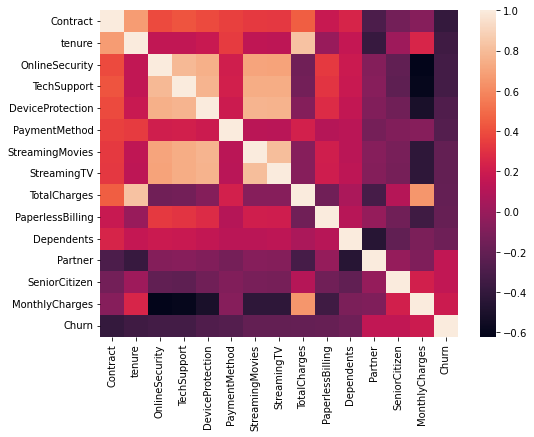

In [593]:
plt.figure(figsize=(8,6))
sea.heatmap(sho_cor, xticklabels=sho_cor.columns, yticklabels=sho_cor.columns)
'''dark portions'''

In this heatmap we can see that the row/column of *churn* is majorly covered with dark coloured blocks, means majority of coorelation are negative.

## Exploring Contract

In [139]:
contract_val = {x:len(short_data[short_data['Contract']==x]) for x in range(3) }

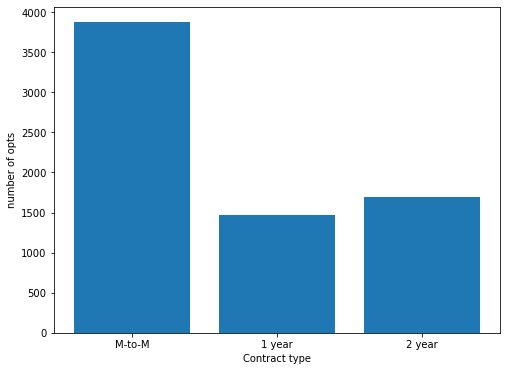

In [594]:
plt.figure(figsize=(8,6))
plt.bar(contract_val.keys(), contract_val.values())
#plt.bar(churn_no)
plt.xlabel('Contract type')
plt.ylabel('number of opts')
plt.xticks([0,1,2],['M-to-M', '1 year', '2 year'])
plt.show()

Basic bargraph to display the amount of customers enrolled to different contracts.

In [368]:
#churn_no = len(short_data[short_data['Churn']==0])
no_of_customers_per_contract = list(contract_val.values())

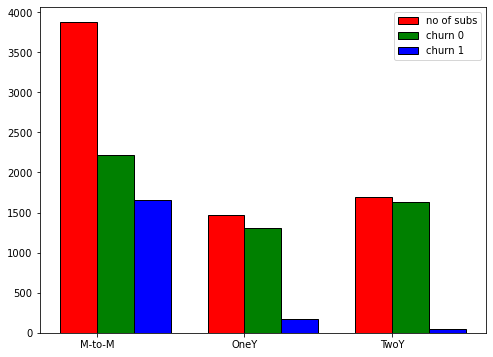

In [595]:
churn_0_df = short_data[short_data['Churn']==0]
churn_0 = [len(churn_0_df[churn_0_df['Contract']==x]) for x in range(3)]

churn_1_df = short_data[short_data['Churn']==1]
churn_1 = [len(churn_1_df[churn_1_df['Contract']==x]) for x in range(3)]


n = 3
r = np.arange(n)
wid = 0.25

plt.figure(figsize=(8,6))
plt.bar(r, no_of_customers_per_contract, color = 'r', width = wid, label = 'no of subs', edgecolor='black')
plt.bar(r+wid, churn_0, color='g', width=wid, label='churn 0', edgecolor='black')
plt.bar(r+wid+wid, churn_1, color='b', width=wid, label='churn 1', edgecolor='black')
plt.xticks(r+wid/2, x_labels)
plt.legend()
plt.show()

This multi-bar graph clearly demonstrates that around 35-40% of customers have churn 1 in the month to month contract, and as the duration of contract increases, the tendency of customer to leave the service decreases.

### Contract duration to Monthly charges relation

In [191]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [190]:
data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.5,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.9,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.6,1


In [201]:
price_m2m = list(data_copy[data_copy['Contract']==0]['MonthlyCharges'])
price_1y = list(data_copy[data_copy['Contract']==1]['MonthlyCharges'])
price_2y = list(data_copy[data_copy['Contract']==2]['MonthlyCharges'])
price = [price_m2m, price_1y, price_2y]

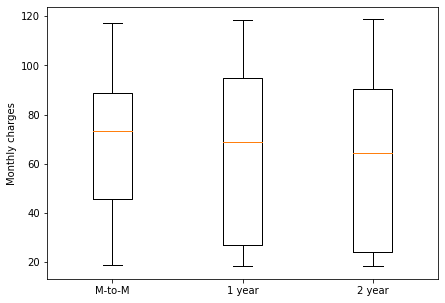

In [442]:
plt.figure(figsize=(7,5))
plt.boxplot(price)
plt.xticks([1,2,3],['M-to-M', '1 year', '2 year'])
plt.ylabel('Monthly charges')
plt.show()

Simple box plot to describe the range of *Monthly charges* based on the contract duration. we can easily spot that the Q1 for 1-year and 2-years contract is much lower than the Q1 of month to month contract.

In [362]:
df_churn_0 = data_copy[data_copy['Churn']==0]
df_churn_1 = data_copy[data_copy['Churn']==1]

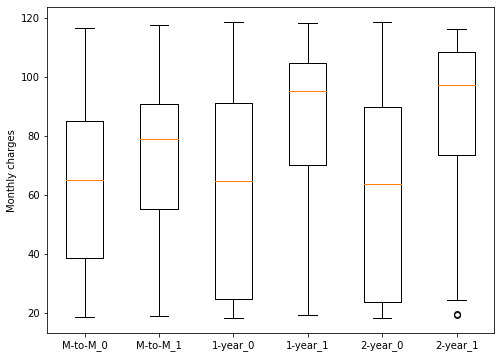

In [596]:
price_m2m_0 = list(df_churn_0[df_churn_0['Contract']==0]['MonthlyCharges'])
price_m2m_1 = list(df_churn_1[df_churn_1['Contract']==0]['MonthlyCharges'])

price_1y_0 = list(df_churn_0[df_churn_0['Contract']==1]['MonthlyCharges'])
price_1y_1 = list(df_churn_1[df_churn_1['Contract']==1]['MonthlyCharges'])

price_2y_0 = list(df_churn_0[df_churn_0['Contract']==2]['MonthlyCharges'])
price_2y_1 = list(df_churn_1[df_churn_1['Contract']==2]['MonthlyCharges'])

price_c = [price_m2m_0, price_m2m_1, price_1y_0, price_1y_1, price_2y_0, price_2y_1]

plt.figure(figsize=(8,6))
plt.boxplot(price_c)
plt.xticks([1,2,3,4,5,6], ['M-to-M_0', 'M-to-M_1', '1-year_0', '1-year_1', '2-year_0', '2-year_1'])
plt.ylabel('Monthly charges')
plt.show()

Decomposed the box plot further with separate representation of pair of contract and churn displayed that the overall pricing is much hoigher where the churn is 1, no matter which contract.

### Tenure

In [277]:
tenure = list(data_copy['tenure'])
churn = list(data_copy['Churn'])

In [287]:
'''tenure_churn_0 = list(data_copy[data_copy['Churn']==0]['tenure'])
tenure_churn_1 = list(data_copy[data_copy['Churn']==1]['tenure'])'''

In [342]:
tenure_to_year = [math.ceil(tenure[x]/12) for x in range(len(tenure))]
set(tenure_to_year)

{1, 2, 3, 4, 5, 6}

Generalised the tenure from months to year for easy handeling of data.

In [344]:
'''for x in range(len(tenure)):
    print(tenure[x], tenure[x]/12,tenure_to_year[x])'''

'for x in range(len(tenure)):\n    print(tenure[x], tenure[x]/12,tenure_to_year[x])'

In [326]:
df_churn_0 = data_copy[data_copy['Churn']==0]
df_churn_1 = data_copy[data_copy['Churn']==1]

In [356]:
churn_tenure_0 = [len(df_churn_0[df_churn_0['tenure'].between((x-1)*12, x*12)]) for x in range(1,7)]
churn_tenure_1 = [len(df_churn_1[df_churn_1['tenure'].between((x-1)*12, x*12)]) for x in range(1,7)]

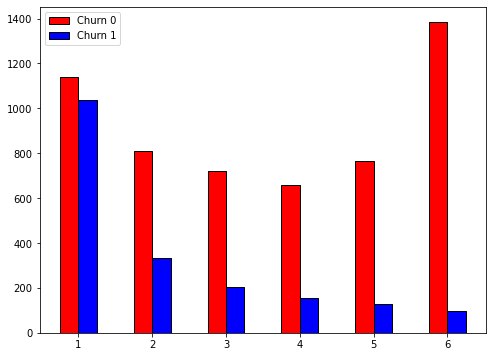

In [597]:
n = 6
r = np.arange(n)
wid = 0.25

plt.figure(figsize=(8,6))
plt.bar(r, churn_tenure_0, color= 'r', width=wid, label = 'Churn 0', edgecolor='black')
plt.bar(r+wid, churn_tenure_1, color='b', width=wid, label='Churn 1', edgecolor='black')
plt.xticks(r+wid/2, ['1', '2', '3', '4', '5', '6'])
plt.legend()
plt.show()

multi bar graph to represent the rate of churn based on the tenure, here we can see that the churn 1 is higher in frequency in the 1 year tenure, but as the tenure increases, the churn rate decreases.

### bar plot all the features with churn rate

In [571]:
del_colu = ['customerID', 'Contract', 'tenure', 'Churn', 'MonthlyCharges', 'TotalCharges']
graph_colu = colu.copy()
for x in del_colu:
    graph_colu.remove(x)
    
graph_colu

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [456]:
data_copy_churn_0 = data_copy[data_copy['Churn']==0]
data_copy_churn_1 = data_copy[data_copy['Churn']==1]

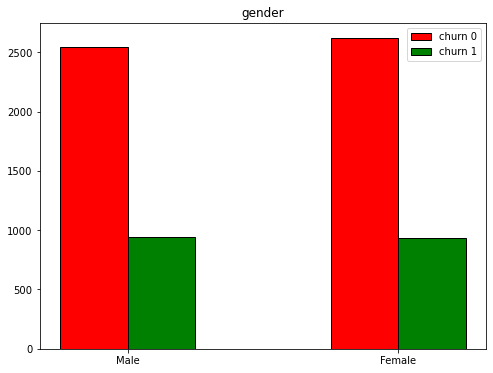

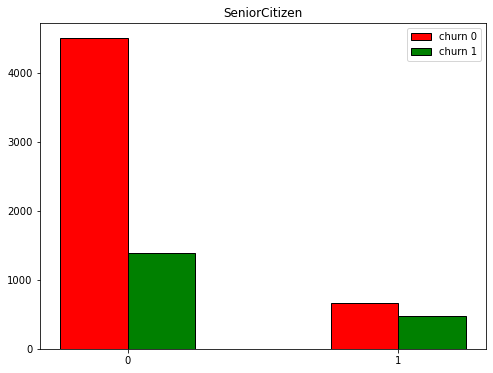

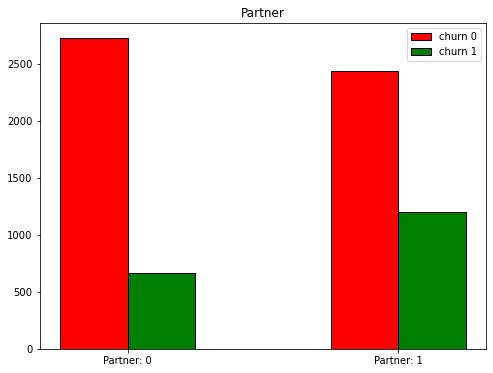

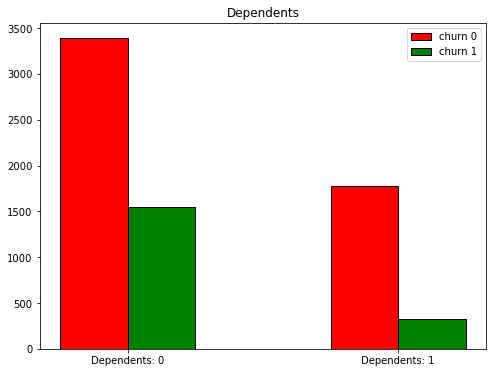

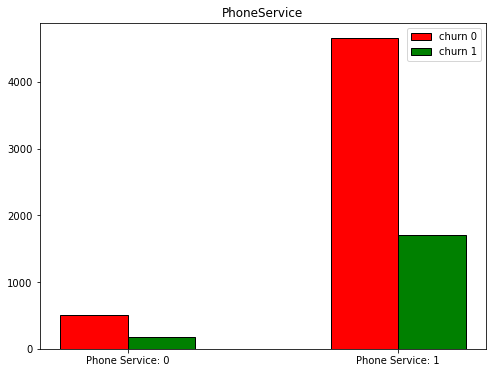

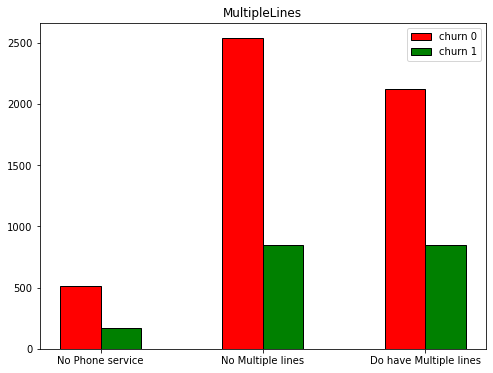

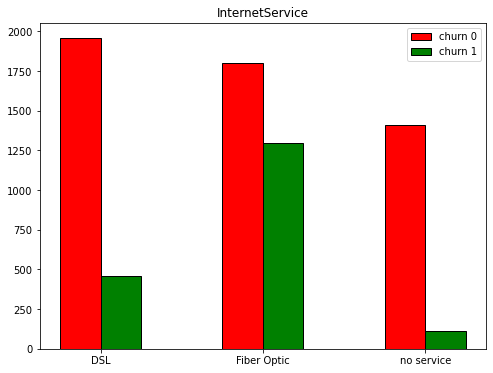

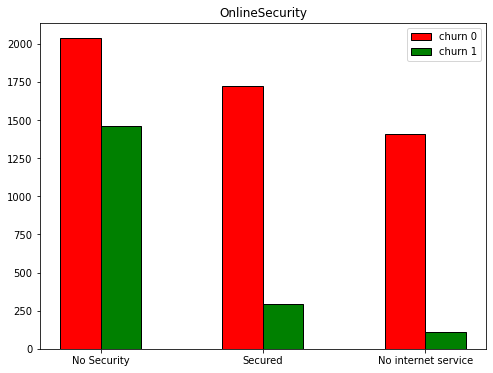

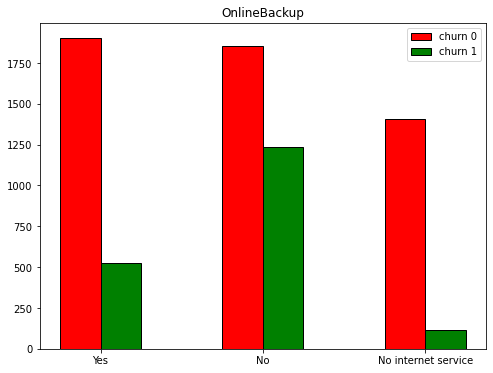

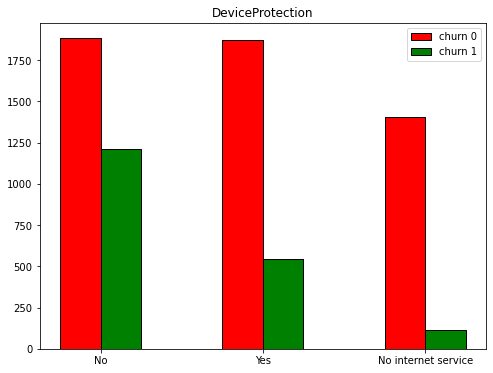

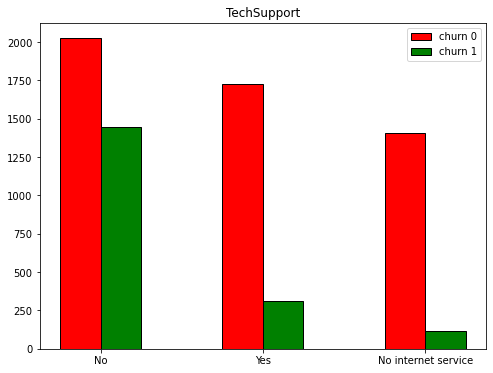

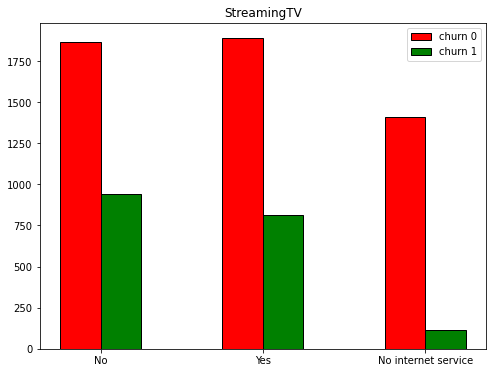

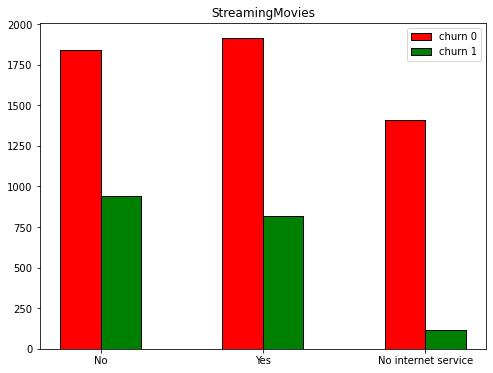

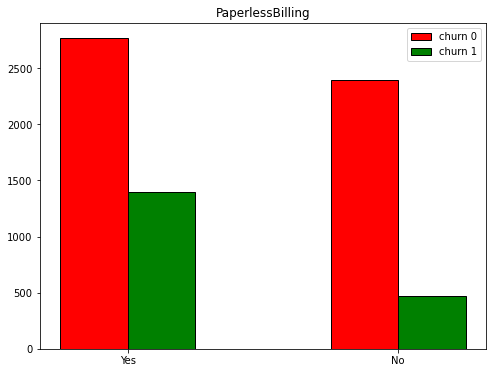

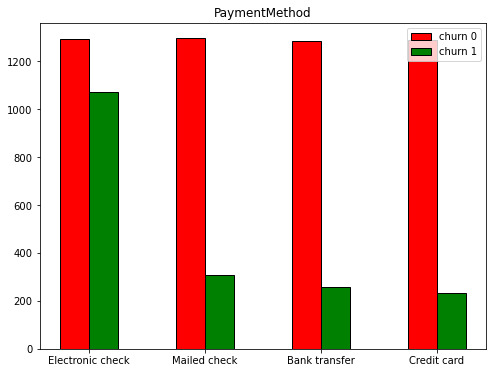

In [598]:
ind = 0
for x in graph_colu:
    n = len(set(data_copy[x]))
    ch_0 = [len(data_copy_churn_0[data_copy_churn_0[x] == xx]) for xx in range(n)]
    ch_1 = [len(data_copy_churn_1[data_copy_churn_1[x] == xx]) for xx in range(n)]

    r = np.arange(n)
    wid = 0.25
    
    plt.figure(figsize=(8,6))
    plt.bar(r, ch_0, color = 'r', width = wid, label = 'churn 0', edgecolor='black')
    plt.bar(r+wid, ch_1, color='g', width=wid, label='churn 1', edgecolor='black')
    plt.xticks(r+wid/2, list_xticks[ind])
    plt.title(x)
    plt.legend()
    plt.show()
    #print(list(set(data[x])))
    ind+=1

#### All the insights from the above set of bargraphs:
A. churn rate is very similar for both the genders.

B. Customers who are partnered with the company have a bit higher tendency to leave.

C. If the customer is a dependent, means they relay on other for their service, then the churn rate is low compared to independent customers.

D. Customers who have opted for *Fiber Optic* service have higher rate of churn then customers who have opted for DSL or no service at all.

E. the churn rate is very high for peoples who have not opted for *Online Security*.

F. People who have not opted for *online backup* also have higher churn rate.

G. *Device protection* also holds the customer, means that churn rate is higher for the customers who have not opted for *device protection*.

H. Churn rate is much higher for customers who didnt got *Tech support*.

I. The churn rate is similar for customers who have opted or not opted for *streaming TV* or *streaming movie* service

J.Customers who opted for *Paperless billing* and pay using *electronic check* have higher tendency to leave the service.

---

---

---
---